## Activity 2 : Classifying Grayscale Handwritten Digits
In this activity, we will learn:

*   MNIST Handwritten Digit Dataset 
*   Load and preprocess the dataset
*   Split the dataset for training and testing
*   Load and preprocess the dataset
*   Define, compile and train a simple model
*   Evaluate the model
*   Improving the model with hidden layers



### MNIST Handwritten Digit Dataset <br>
a)	The MNIST dataset is an acronym that stands for the Modified National Institute of Standards and Technology dataset.   It is a dataset of 70,000 small square 28 × 28 pixel grayscale images of handwritten single digits between 0 and 9.

b)	Keras provides access to the MNIST dataset via the mnist.load_dataset() function. It returns two tuples, one with the input and output elements for the standard training dataset, and another with the input and output elements for the standard test dataset. The code snippet below loads the dataset and summarizes the shape of the loaded dataset. 


### Import necessary libraries and dataset

In [ ]:
from keras import models
from keras import layers
from keras.datasets import mnist
from keras.utils import to_categorical

# Load the MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print('train_images shape:', train_images.shape)
print('test_images shape:', test_images.shape)
print('train_labels shape:', train_labels.shape)

11493376/11490434 [==============================] - 0s 0us/step
train_images shape: (60000, 28, 28)
test_images shape: (10000, 28, 28)
train_labels shape: (60000,)


Running the above loads the dataset and prints the shape of the input and output components of the train, test and train labels and test splits of images.

Display a sample<br>
The images are grayscale with a black background (0 pixel value) and the handwritten digits in white (pixel values near 255).  The images are easier to review when we reverse the colours and plot the background as white and the handwritten digits in black.

Label = 9


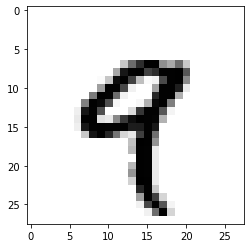

In [ ]:
extract_digit = 4
digit = train_images[extract_digit]
label = train_labels[extract_digit]
print("Label =",label)
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

### Process the data for the usage of ANN <br>


The next preprocessing task we need to perform is to flatten the 2D images into a 1D array.  Due to all the weights computation, we will need to normalise the pixel value by dividing them by 255.

Note: Although images are represented with 2D arrays.  For our ANN, we will use numpy’s reshape() to change it into a 1D array instead.  That is:

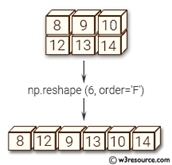

In [ ]:
train_images = train_images.reshape((60000, 28 * 28)) # Flatten the image.  Our ANN can handle only 1D data
train_images = train_images.astype('float32') / 255 # normalise data to 0-1
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

We then use keras utility function to_categorical() function convert an array of labelled data(from 0 to 9) to one-hot vector. An example if given below:

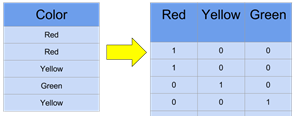

For an indepth discussion on one-hot encoding, please refer to https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/




* Use to_categorical() to convert a class vector (integers) to binary class matrix.  A visual example is shown below to illustrate the operation.

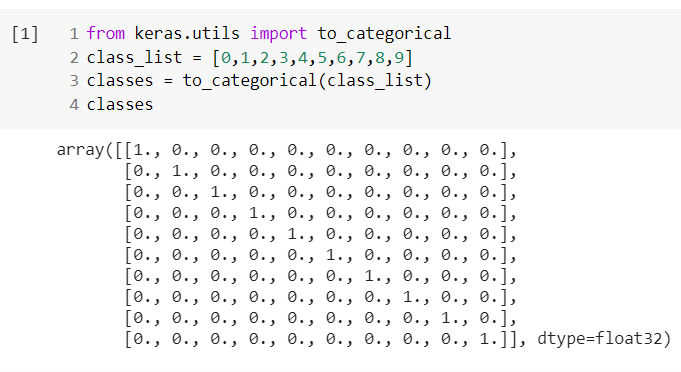

In [ ]:
train_labels = to_categorical(train_labels) # Converts a class vector (integers) to binary class matrix.
test_labels = to_categorical(test_labels)

### Define the network





Now we are ready to define our neural network.  Keras has different APIs for defining neural networks that we can choose between. The most commonly used is the Sequential API. The Sequential API is the version in which we define it one layer at a time, in sequence. It’s the easiest way to do it, so that’s what we’ll use too. So, first we create a new **Sequential()** model.
Ref: https://keras.io/guides/sequential_model/

This is the model object to which we’ll add our layers. Now we can define the layers of our neural network calling the **network.add()** **function** and passing in the kind of layer we want to add. 
So far, we’ve only learned about the simplest kind of neural network layer where every node in the layer is connected to every node in the following layer. These are called dense layers because the nodes are densely connected. 
Ref: https://keras.io/api/layers/core_layers/dense/

To create a dense layer in Keras, we can create new **Dense()** objects and add them to the model.

Note:  
* This network without any hidden layer cannot effectively classify the MNIST data.
* activation is the element-wise activation function passed as the activation argument. Ref: https://keras.io/api/layers/activations/

We are using the Keras API to define our neural network, but it uses TensorFlow behind the scenes to do all the math. Now that we’ve declared all the layers, we need to tell Keras to construct the neural network inside of TensorFlow for us. To do that, we’ll call the **compile()** function:

There are two important parameters that we need to specify: 
* **loss** is the loss or cost function we are using to measure how wrong our neural network currently is. The Keras documentation lists out all the possible loss functions that you can choose from. Since we are predicting categorial values, we use categorical_crossentropy. Ref: https://keras.io/api/losses/ 
* **optimizer** is which numerical optimization algorithm we will use to train the neural network. We will use rmsprop, one of the many gradient descent optimization algorithms provided in keras.  For an indepth discussion, please refer to https://ruder.io/optimizing-gradient-descent/
* **metric** is a list of metrics to be evaluated by the model during training and testing. Each of this can be a string (name of a built-in function).  Ref: https://keras.io/api/metrics/ 
* You can use **network.summary()** to print out the details of your network.

Type the following block of code in the next code block to create the network.

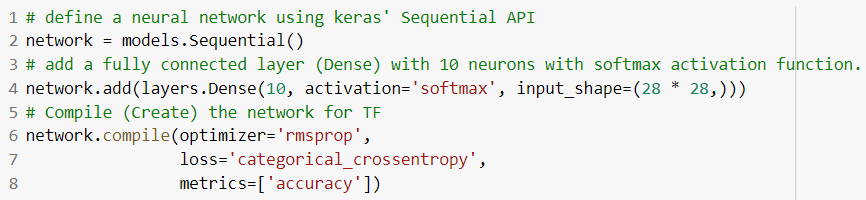

In [ ]:
#
#[ENTER YOUR CODE HERE]
#

In the next code block, print a summary of the network using the network.summary() method.  You should see a table similar to the following diagram.

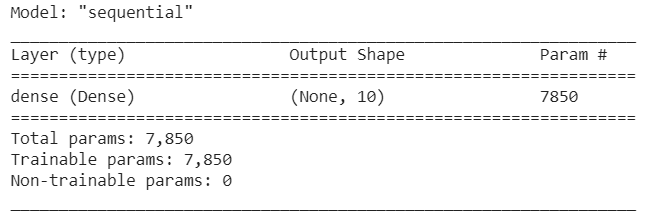

Note:	In the **Output Shape** above, ***None*** means this dimension is variable. The first dimension in a keras model is always the batch size. You don't need fixed batch sizes, unless in very specific cases (for instance, when working with stateful=True LSTM layers).  That's why this dimension is often ignored when you define your model. For instance, when you define input_shape=(100,200), actually you're ignoring the batch size and defining the shape of "each sample". Internally the shape will be (None, 100, 200), allowing a variable batch size, each sample in the batch having the shape (100,200).  The batch size will be then automatically defined in the fit or predict methods.

In [ ]:
# print the network
network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


### Train the network


Now we’re ready to train the model. Keras models its syntax on scikit-learn, so its training function is also called **fit()**.

First, we pass in the training data and the matching answers for each training example. Then we have several parameters that we can control: 
* **epochs** is how many times we will loop through the entire training dataset before ending the gradient descent training process. 
*	**batch_size** controls how many training examples are considered at once during each gradient descent update pass. 


In [ ]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 4s 2ms/step - loss: 0.9280 - accuracy: 0.7679
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.3392 - accuracy: 0.9064
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.3043 - accuracy: 0.9149
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.2916 - accuracy: 0.9180
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.2837 - accuracy: 0.9218


### Evaluate the network


After training, we can call the **evaluate()** function to have a feel of how our model perform

In [ ]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.2730 - accuracy: 0.9235
test_acc: 0.9235000014305115


### Exercise


Add a hidden fully connected layer with 128 neurons and relu activation function to the neural network.  Retrain the network and evaluate the performance in the following code block.

In [ ]:
#
#[ENTER YOUR CODE HERE]
#